# COMP60711 - Part 2 Coursework 1

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Professor John Keane                                                                                                                                                          |
|                    Marks: | This course is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **3rd** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Thursday 28th October 9AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|       11124826                 |  Dylon Chung Yee Wong         |

## Reminders
* **Please make clear any assumptions and provide evidence to justify your answers** 
* Jupyter notebooks use markdown. A brief summary of how to use markdown can be seen [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Otherwise, please refer to the brief guide on Blackboard.
* You **must** cite any sources used, from web pages to academic papers and textbooks.
* Please ensure your code has no errors, and that the output is shown in your submitted version.
* We have added some general notebooks on Blackboard to cover the basics of plotting in Python, Jupyter notebooks, and anaconda.
* Some questions require a mixture of code and text to answer the question. Marks are awarded based on the output of your code (i.e. graphs) and the explanation provided, not on the code itself.

# Question 1: Clustering (16 marks)

The following sub-questions are about [clustering](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf). In general, the topics covered are as follows:
* Question 1.1 focuses on clustering algorithmic behaviour, and their sensitivity to data.
* Question 1.2 focuses on method for estimating the number of clusters.
* Question 1.3 uses a large real-world dataset to look at how clustering can be used for knowledge discovery.

The following reading is likely to be of use for the following questions:
1. Book chapter on clustering: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf
    * Note that certain sections may be useful, you are not expected to read it all!
2. Here is an example of running KMeans using scikit-learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

For this question, we will use multiple datasets, which can all be found on Blackboard. To load these datasets in, we can use the following code. Note that you may need to adjust the path to the dataset, depending on where they are located on your system.

In [1]:
import pandas as pd

def load_dataset(file_name, **kwargs):
    try:
        data = pd.read_csv(file_name, **kwargs)
    except FileNotFoundError:
        raise FileNotFoundError(f"Cannot find {file_name}, please either place the file in the same directory as this notebook, or provide the full path")
    labels = data.values[:, -1]
    data = data.values[:, :-1]
    return data, labels

# This loads the dataset used in Q1.1a
simple_data, simple_labels = load_dataset("simple.csv")

## Q1.1 (6 marks)

### Q1.1a (2 marks)
Using `simple.csv`, run the K-Means and single-linkage algorithms (available in [`scikit-learn`](https://scikit-learn.org/stable/modules/clustering.html)) on the dataset, using the true number of clusters ($K=5$). Produce a graph (e.g. bar chart) showing the performance (measured using the [adjusted rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)) across 10 independent runs. Discuss the results obtained, using your knowledge of how the algorithms work to explain why the behaviour observed occurred.

**Hints:**
* This question is more difficult without the use of error bars!
* For single-linkage, use `AgglomerativeClustering(n_clusters=5, linkage="single")`
* For KMeans, use `KMeans(n_clusters=5, init="random", n_init=1)` as arguments.

### Q1.1a Answer

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np


def clusters_comp(X, labels):
    cmap1 = ListedColormap(["#ff595e", "#ffca3a", "#8ac926", "#1982c4", "#6a4c93"], name="Quantitative")
    results = pd.DataFrame({"ar_scores_km":[], "ar_scores_ac":[]})
    fig1, axs1 = plt.subplots(2,5,figsize=(25, 10))
    fig2, axs2 = plt.subplots(2,5,figsize=(25, 10))

    fig1.suptitle("KMeans clustering", fontsize=25)
    fig2.suptitle("Agglomerative Clustering", fontsize=25)

    fig1.tight_layout()
    fig2.tight_layout()

    for i in range(10):
        km = KMeans(n_clusters=5, init="random", n_init=1).fit(X)
        ac = AgglomerativeClustering(n_clusters=5, linkage="single").fit(X)

        df_k = pd.DataFrame({
            "predictions": km.labels_,
            "truth": labels,
            "x": X[:, 0],
            "y": X[:, 1]
        })

        df_a = pd.DataFrame({
            "predictions": ac.labels_,
            "truth": labels,
            "x": X[:, 0],
            "y": X[:, 1]
        })
        # Create the scatter plot
        # Only create the legend for the final plot
        sns.scatterplot(
            x="x",
            y="y",
            data=df_k,
            hue="truth",
            style="predictions",
            ax=axs1[i//5, i%5],
            legend="brief",
            palette="deep"
        )

        sns.scatterplot(
            x="x",
            y="y",
            data=df_a,
            hue="truth",
            style="predictions",
            ax=axs2[i//5, i%5],
            legend="brief",
            palette="deep"
        )

        results.loc[i] = [adjusted_rand_score(labels, km.labels_), adjusted_rand_score(labels, ac.labels_)]

    print(results)
    desc = pd.DataFrame(results).describe().loc[["mean","std"],:]
    plt.figure()
    desc.loc["mean",:].plot.bar(yerr=desc.loc["std", :])
    print(desc)

   ar_scores_km  ar_scores_ac
0      0.591872      0.707057
1      0.675462      0.707057
2      0.947980      0.707057
3      0.680189      0.707057
4      0.608982      0.707057
5      0.947911      0.707057
6      0.608908      0.707057
7      0.918196      0.707057
8      0.918196      0.707057
9      0.918196      0.707057
      ar_scores_km  ar_scores_ac
mean      0.781589  7.070570e-01
std       0.159333  1.170278e-16


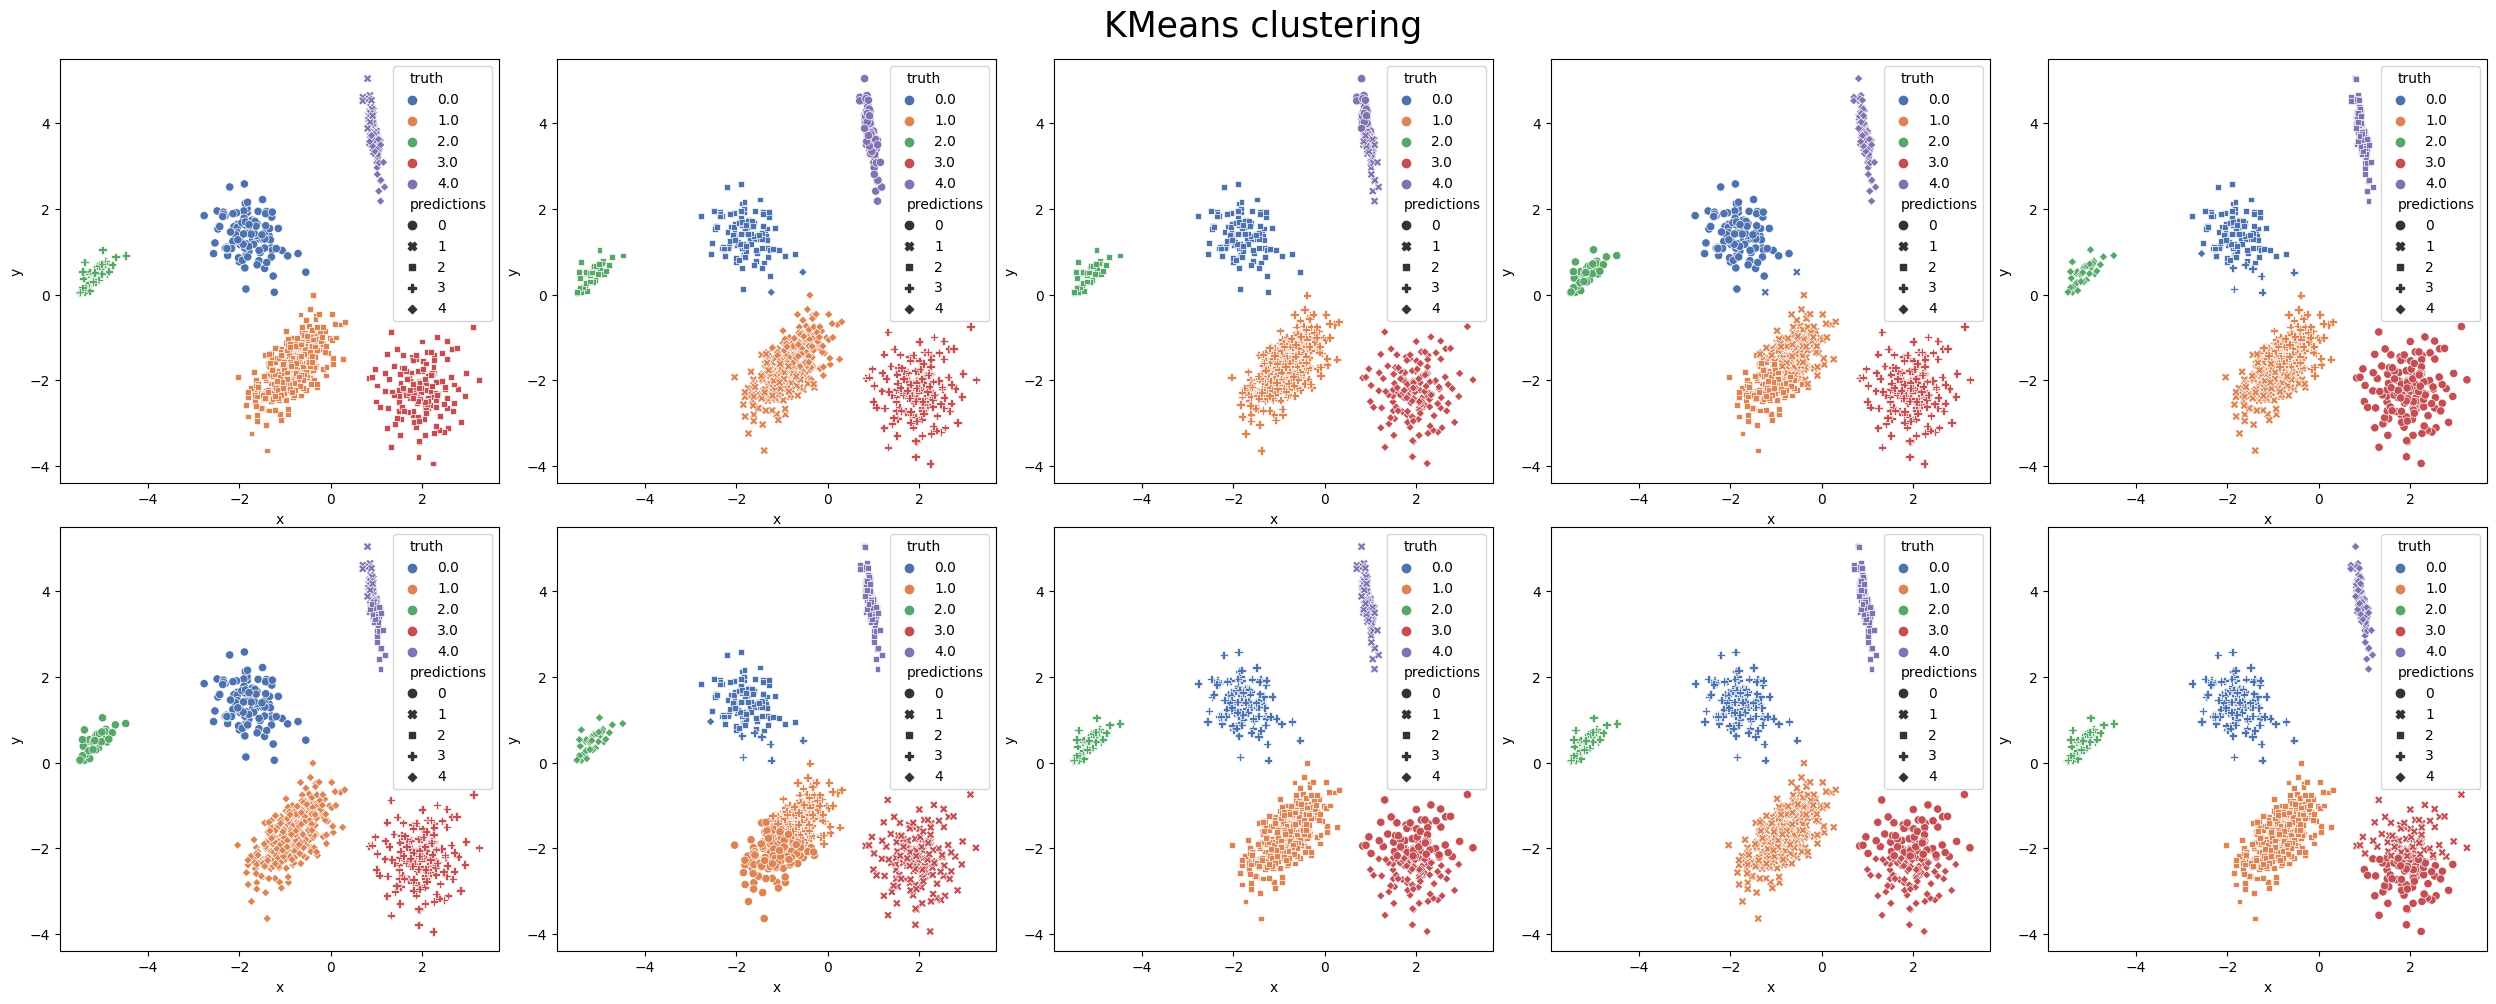

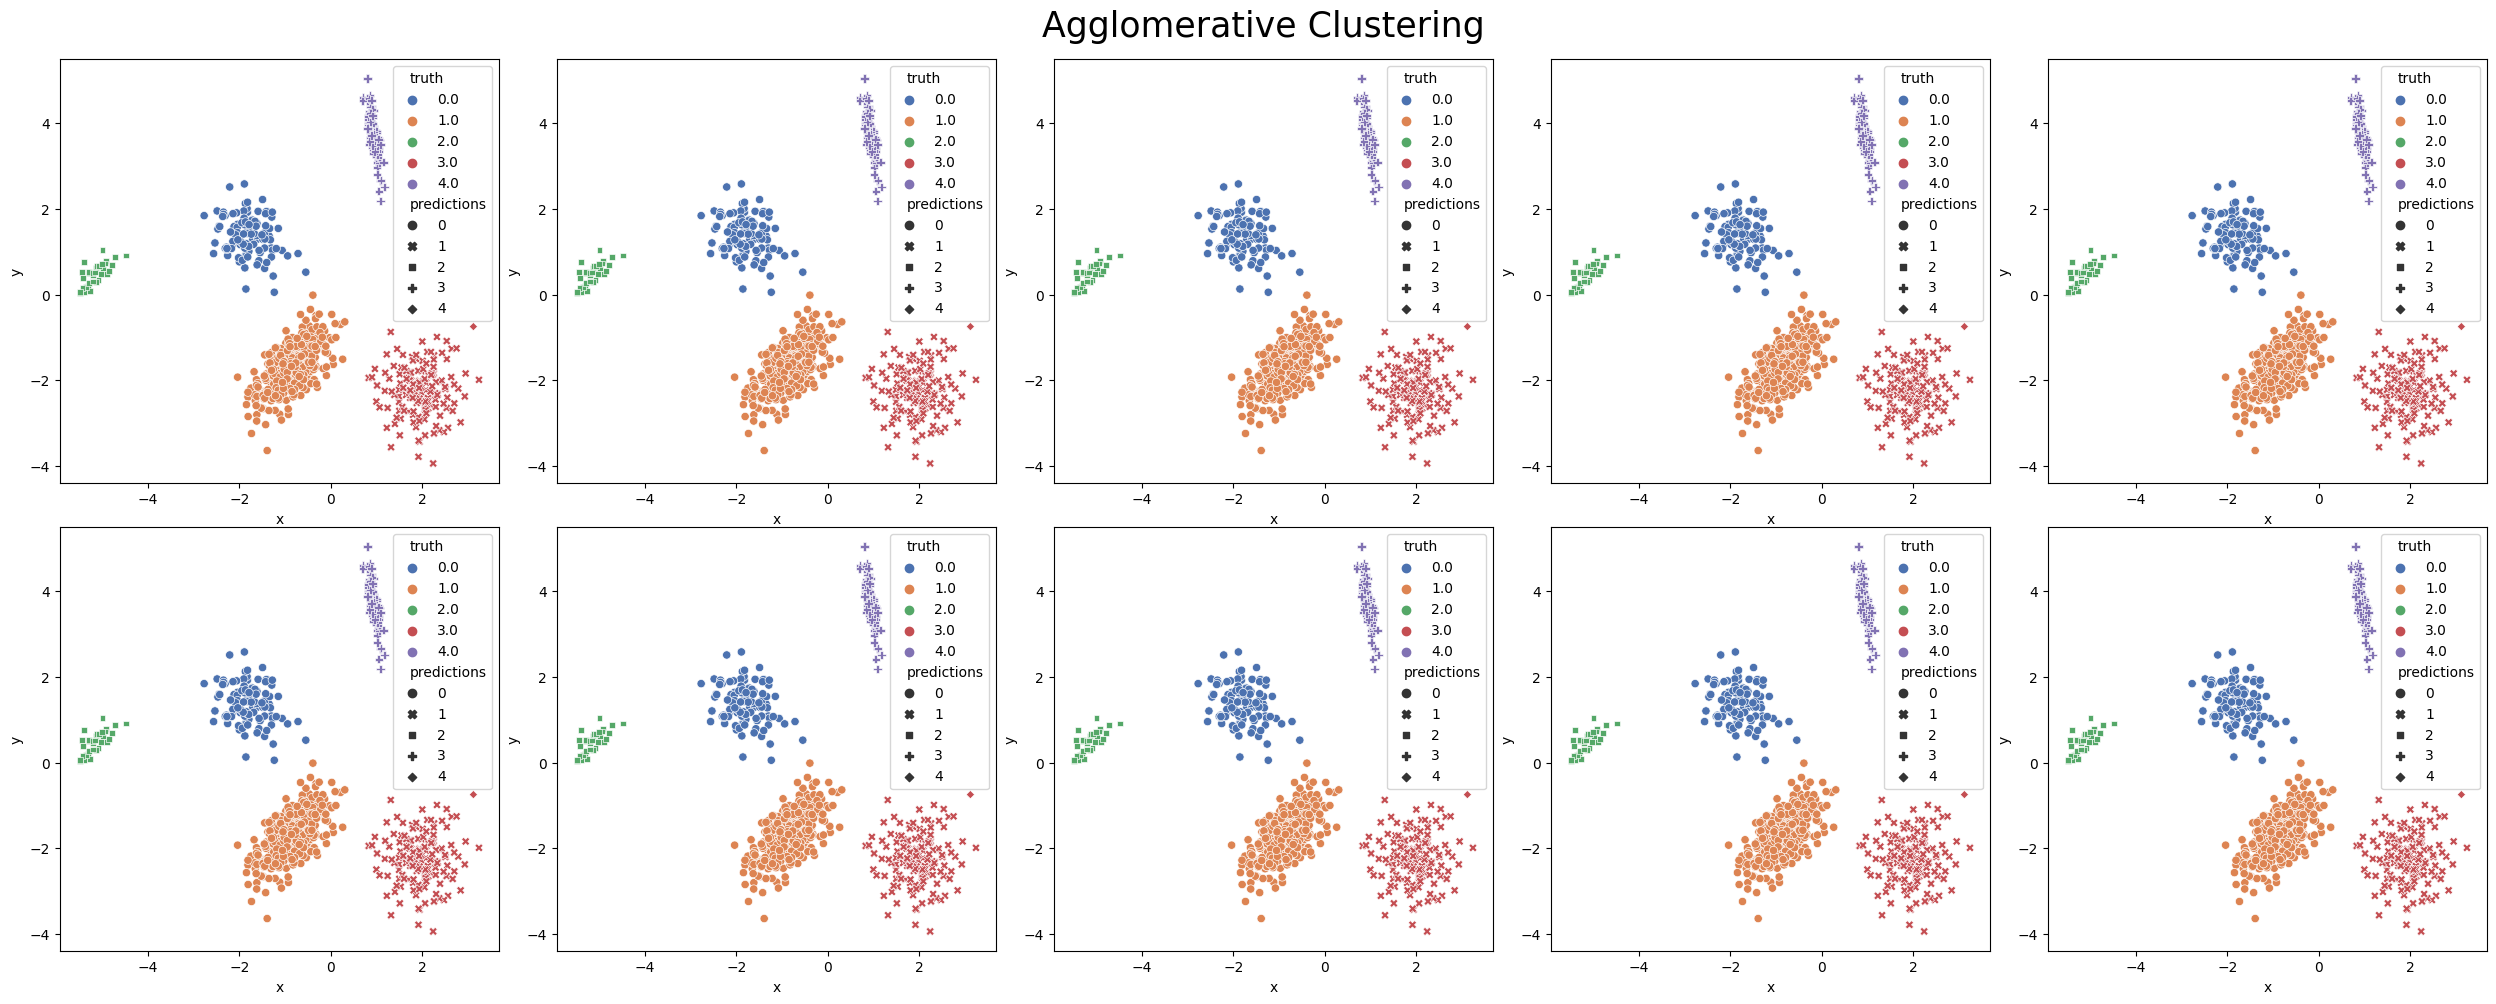

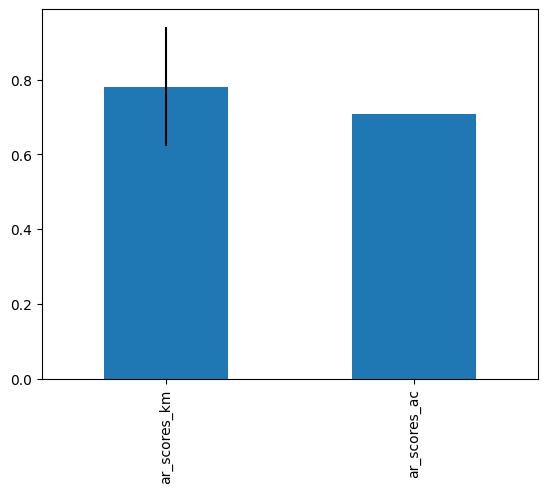

In [3]:
# compare two clustering algorithm
clusters_comp(simple_data, simple_labels)

#### Discussion
The result obtained shows that KMeans has a higher average Adjusted Rand Index over 10 iterations than Agglomerative Clustering, roughly at **0.80** for the former and **0.71** for the latter. Besides, the standard deviation (std) of KMeans' result is approximately **0.18**, indicating the results having differences, but the std of Agglomerative Clustering is nearly **0**. This is mainly due to the randomness in KMeans' algorithm, where $K=5$ random distinct initial points are selected every run. However, there is no randomness in Agglomerative Clustering, hence the result is always fixed given the same parameters. Due to this property, the KMeans model can obtain higher average score when it lands the 5 initial points on the correct clusters.  

### Q1.1b (2 marks)

Using the dataset named `q1-1b.csv`, perform the same experiment as in Q1.1a. Discuss the ARI results obtained, particularly how and why the results are different from Q1.1a.

**Hint:**
* Visualizing the data itself may help to support your discussion.

### Q1.1b Answer

In [4]:
# Loads data for Q1.1b
q11b_data, q11b_labels = load_dataset("q1-1b.csv")

   ar_scores_km  ar_scores_ac
0      0.740163      0.003342
1      0.738633      0.003342
2      0.734747      0.003342
3      0.736063      0.003342
4      0.995300      0.003342
5      0.739697      0.003342
6      0.740163      0.003342
7      0.737699      0.003342
8      0.995300      0.003342
9      0.740163      0.003342
      ar_scores_km  ar_scores_ac
mean      0.789793  3.341661e-03
std       0.108327  4.571398e-19


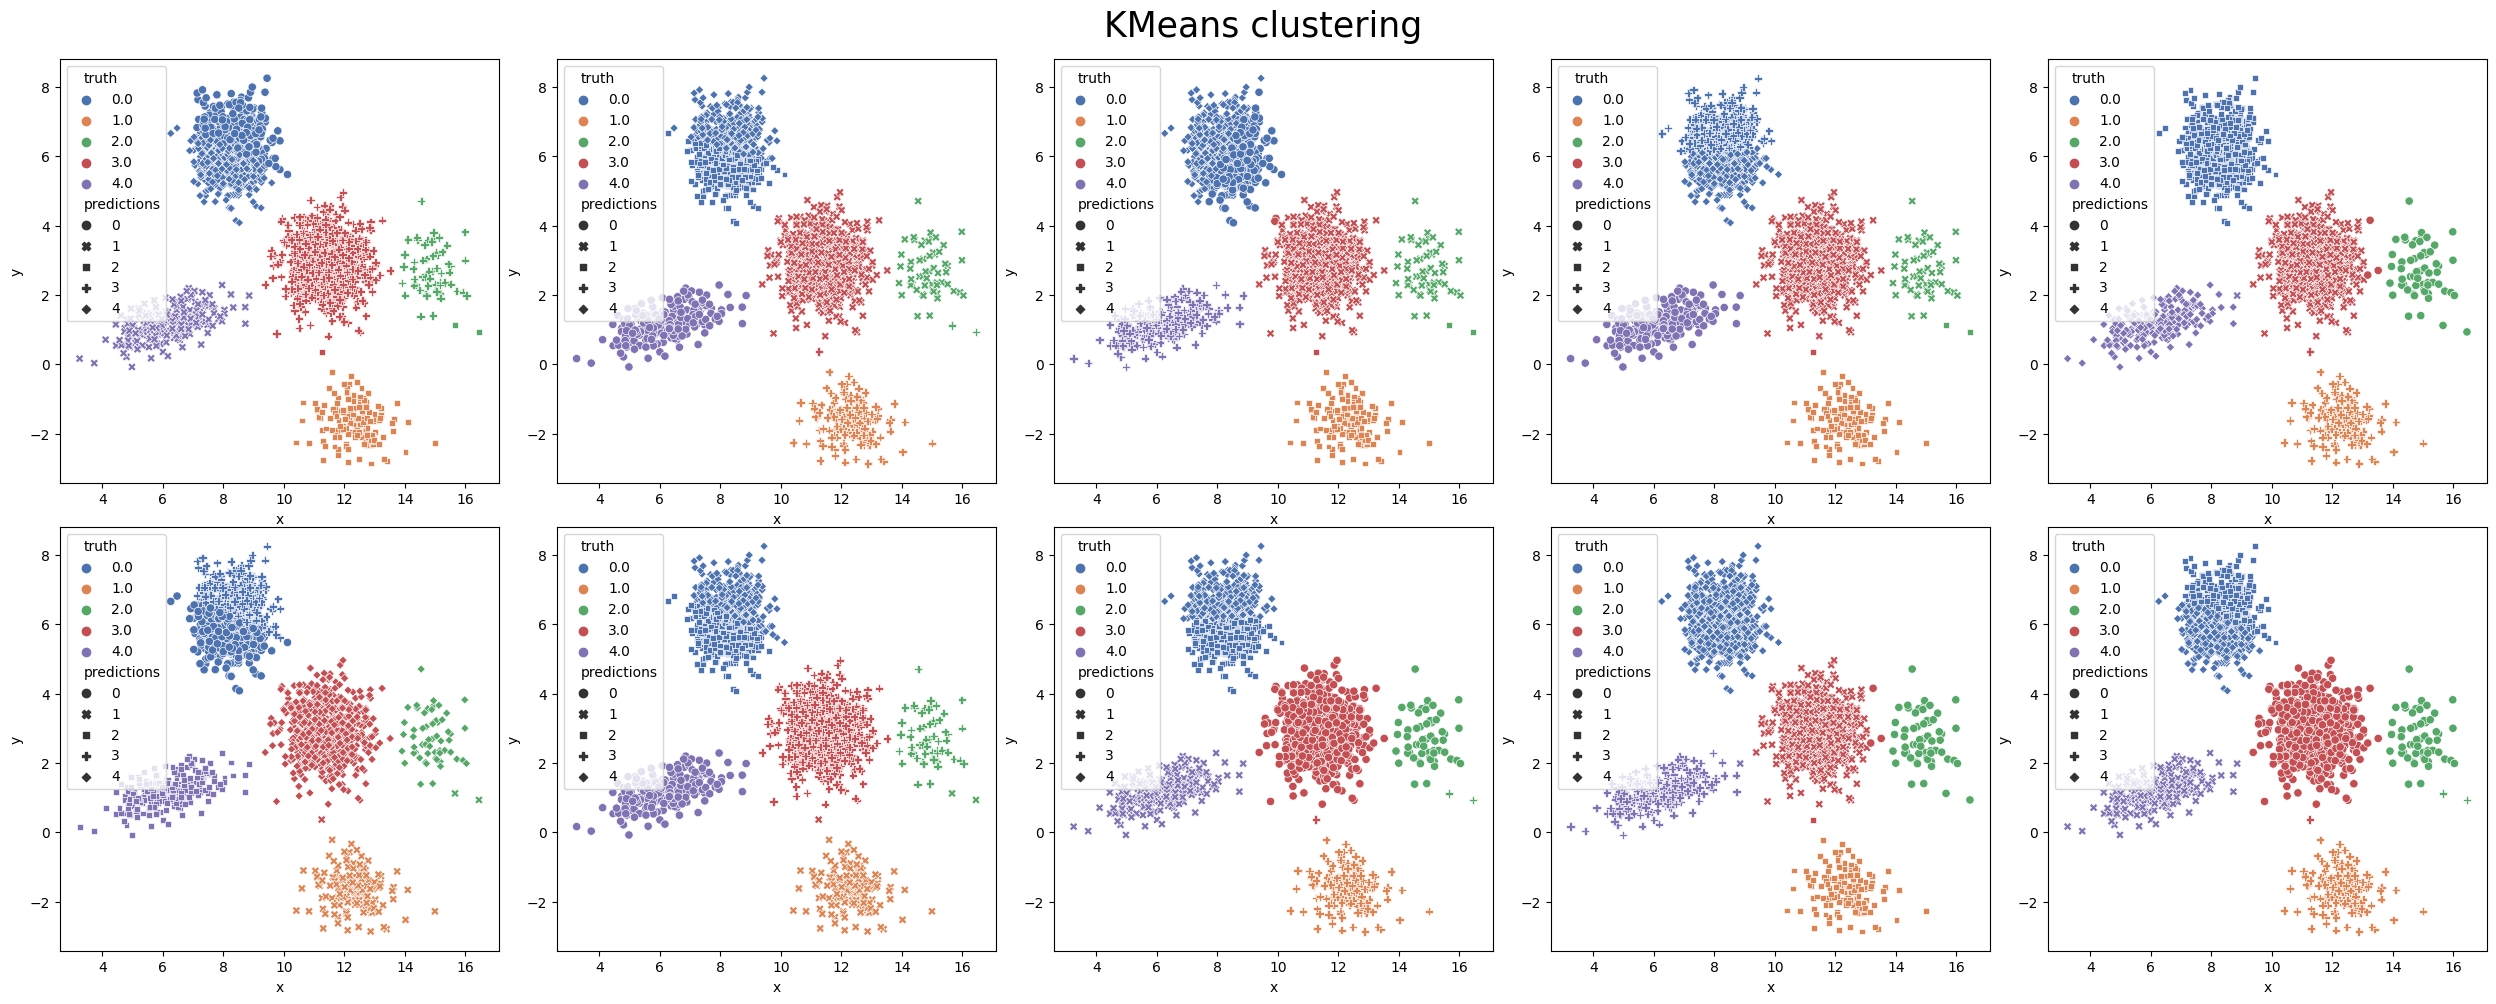

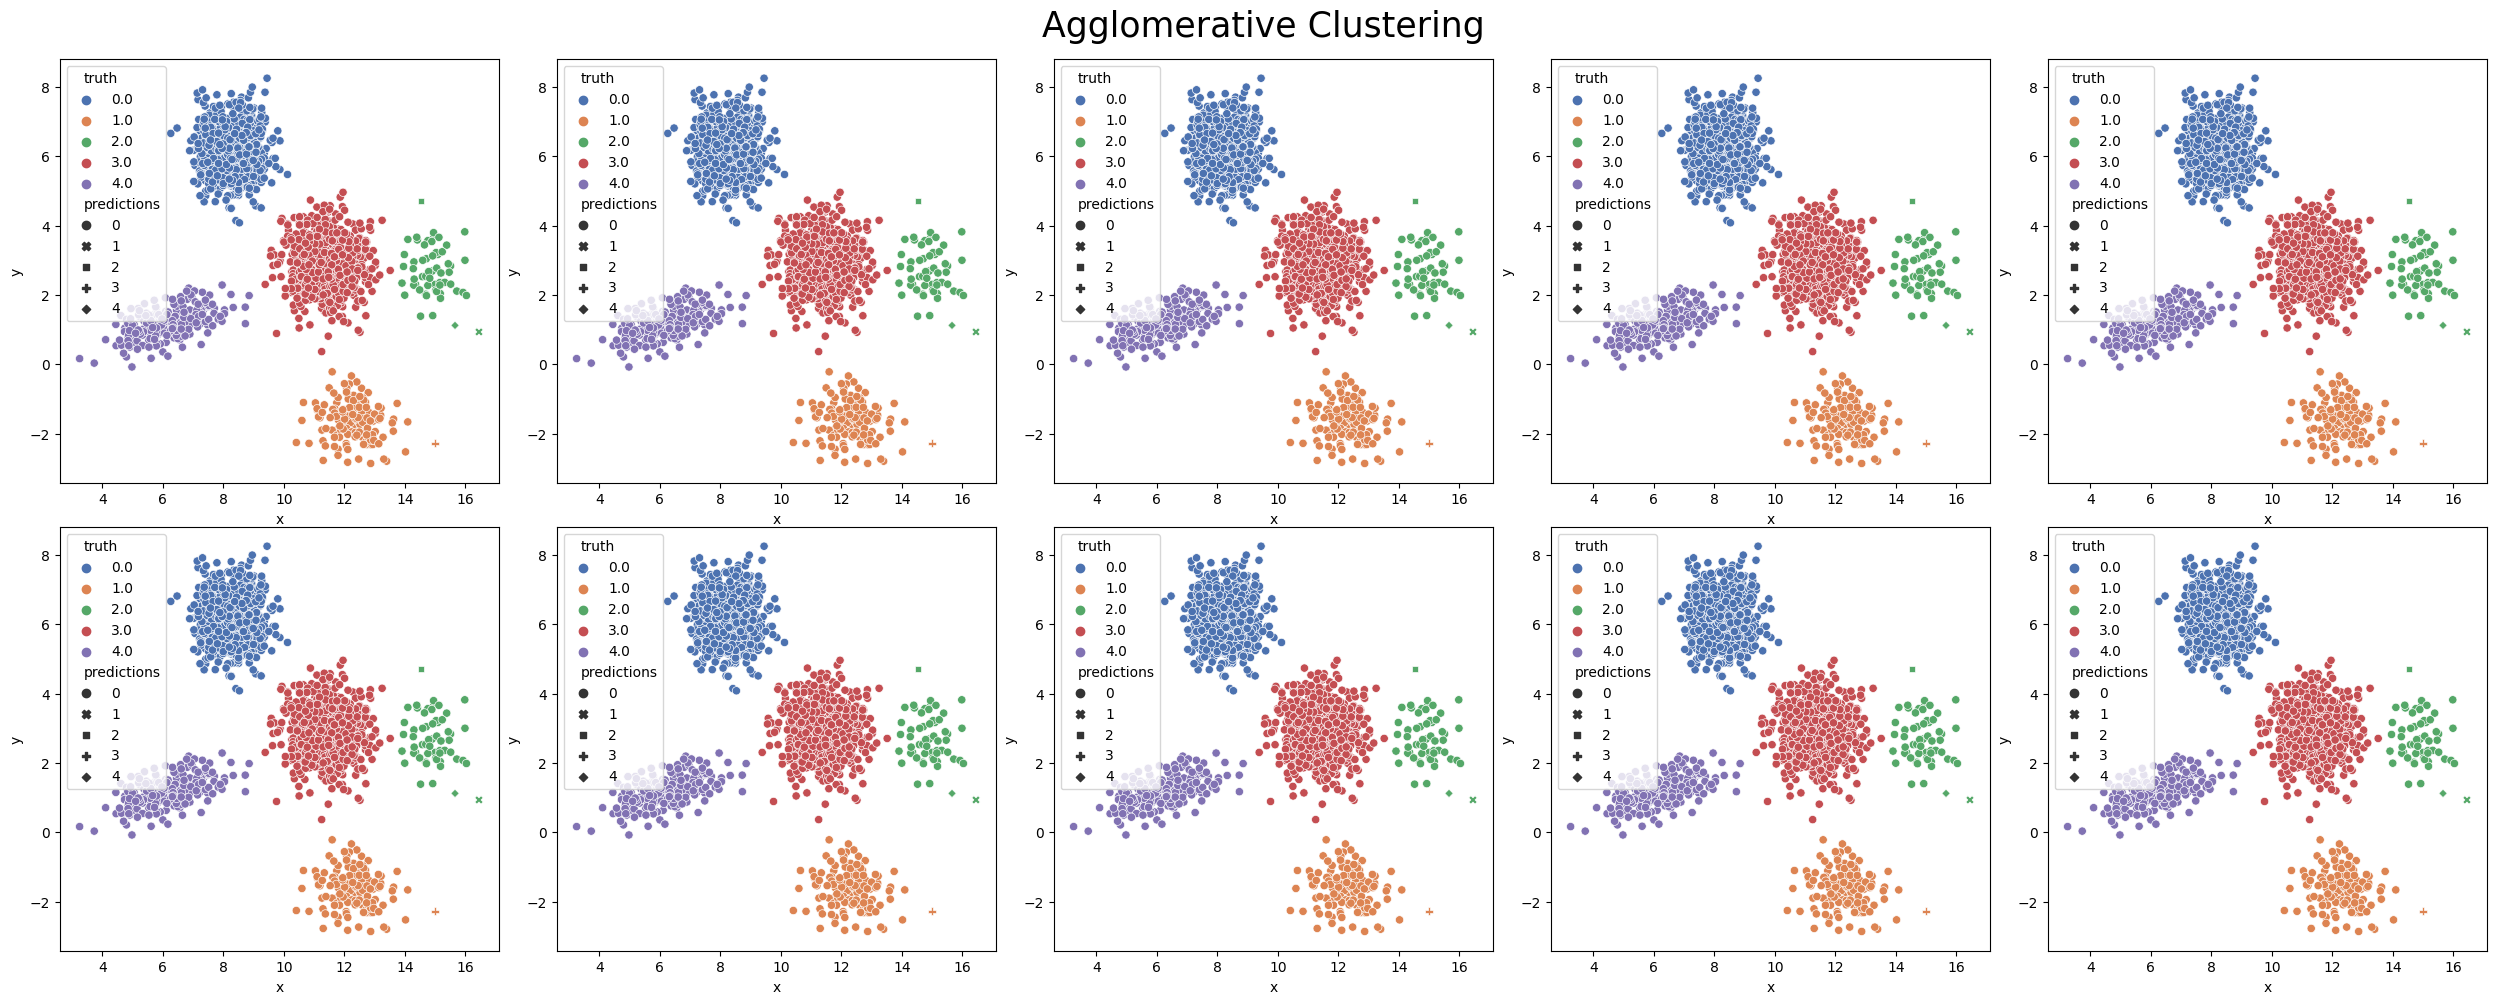

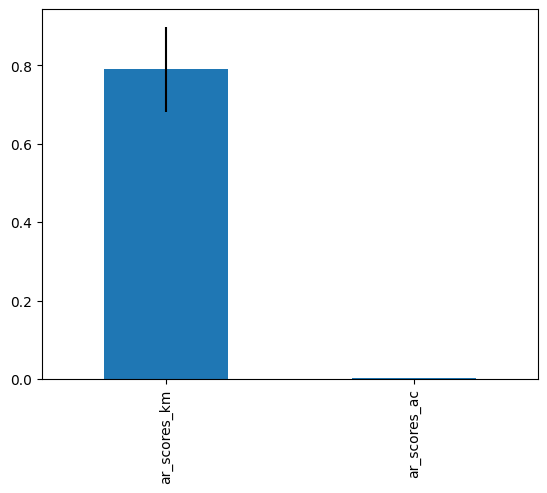

In [5]:
clusters_comp(q11b_data, q11b_labels)

#### Discussion
In this case, the ARI of Agglomerative Clustering falls drastically to 0.003 while KMeans remains the same. 

As mentioned in the previous task, KMeans uses randomness and average of euclidean distances between samples and the center point to perform clustering. In contrast, a single-linkage Agglomerative Clustering uses the minimum distances of cluster pairs to update and combine the pairs into larger clusters. Therefore, the data will slowly be included into a closer cluster. However, this property also causes single linkage to be more sensitive to noise [1]. As a result, the noises around the cluster edges causes the algorithm to combine different clusters as one. Ultimately, the outliers form independent clusters because they are far away from any points.

***References:***<br>
[1] Tan, P. et al. (2019). Cluster Analysis: Basic Concepts and Algorithms. Introduction to data mining. NY NY: Pearson, pp. 526–612.

### Q1.1c (2 marks)

Using the dataset named `q1-1c.csv`, perform the same experiment as in Q1.1b. Discuss the results obtained, particularly how and why the results are different from Q1.1b.

**Hints:**
* Visualizing the data itself may help to support your discussion.

### Q1.1c Answer

In [6]:
# Loads data for Q1.1c
q11c_data, q11c_labels = load_dataset("q1-1c.csv")

   ar_scores_km  ar_scores_ac
0      0.390391           1.0
1      0.385883           1.0
2      0.390740           1.0
3      0.928523           1.0
4      0.523947           1.0
5      0.393826           1.0
6      0.574318           1.0
7      0.393077           1.0
8      0.566528           1.0
9      0.394349           1.0
      ar_scores_km  ar_scores_ac
mean      0.494158           1.0
std       0.171482           0.0


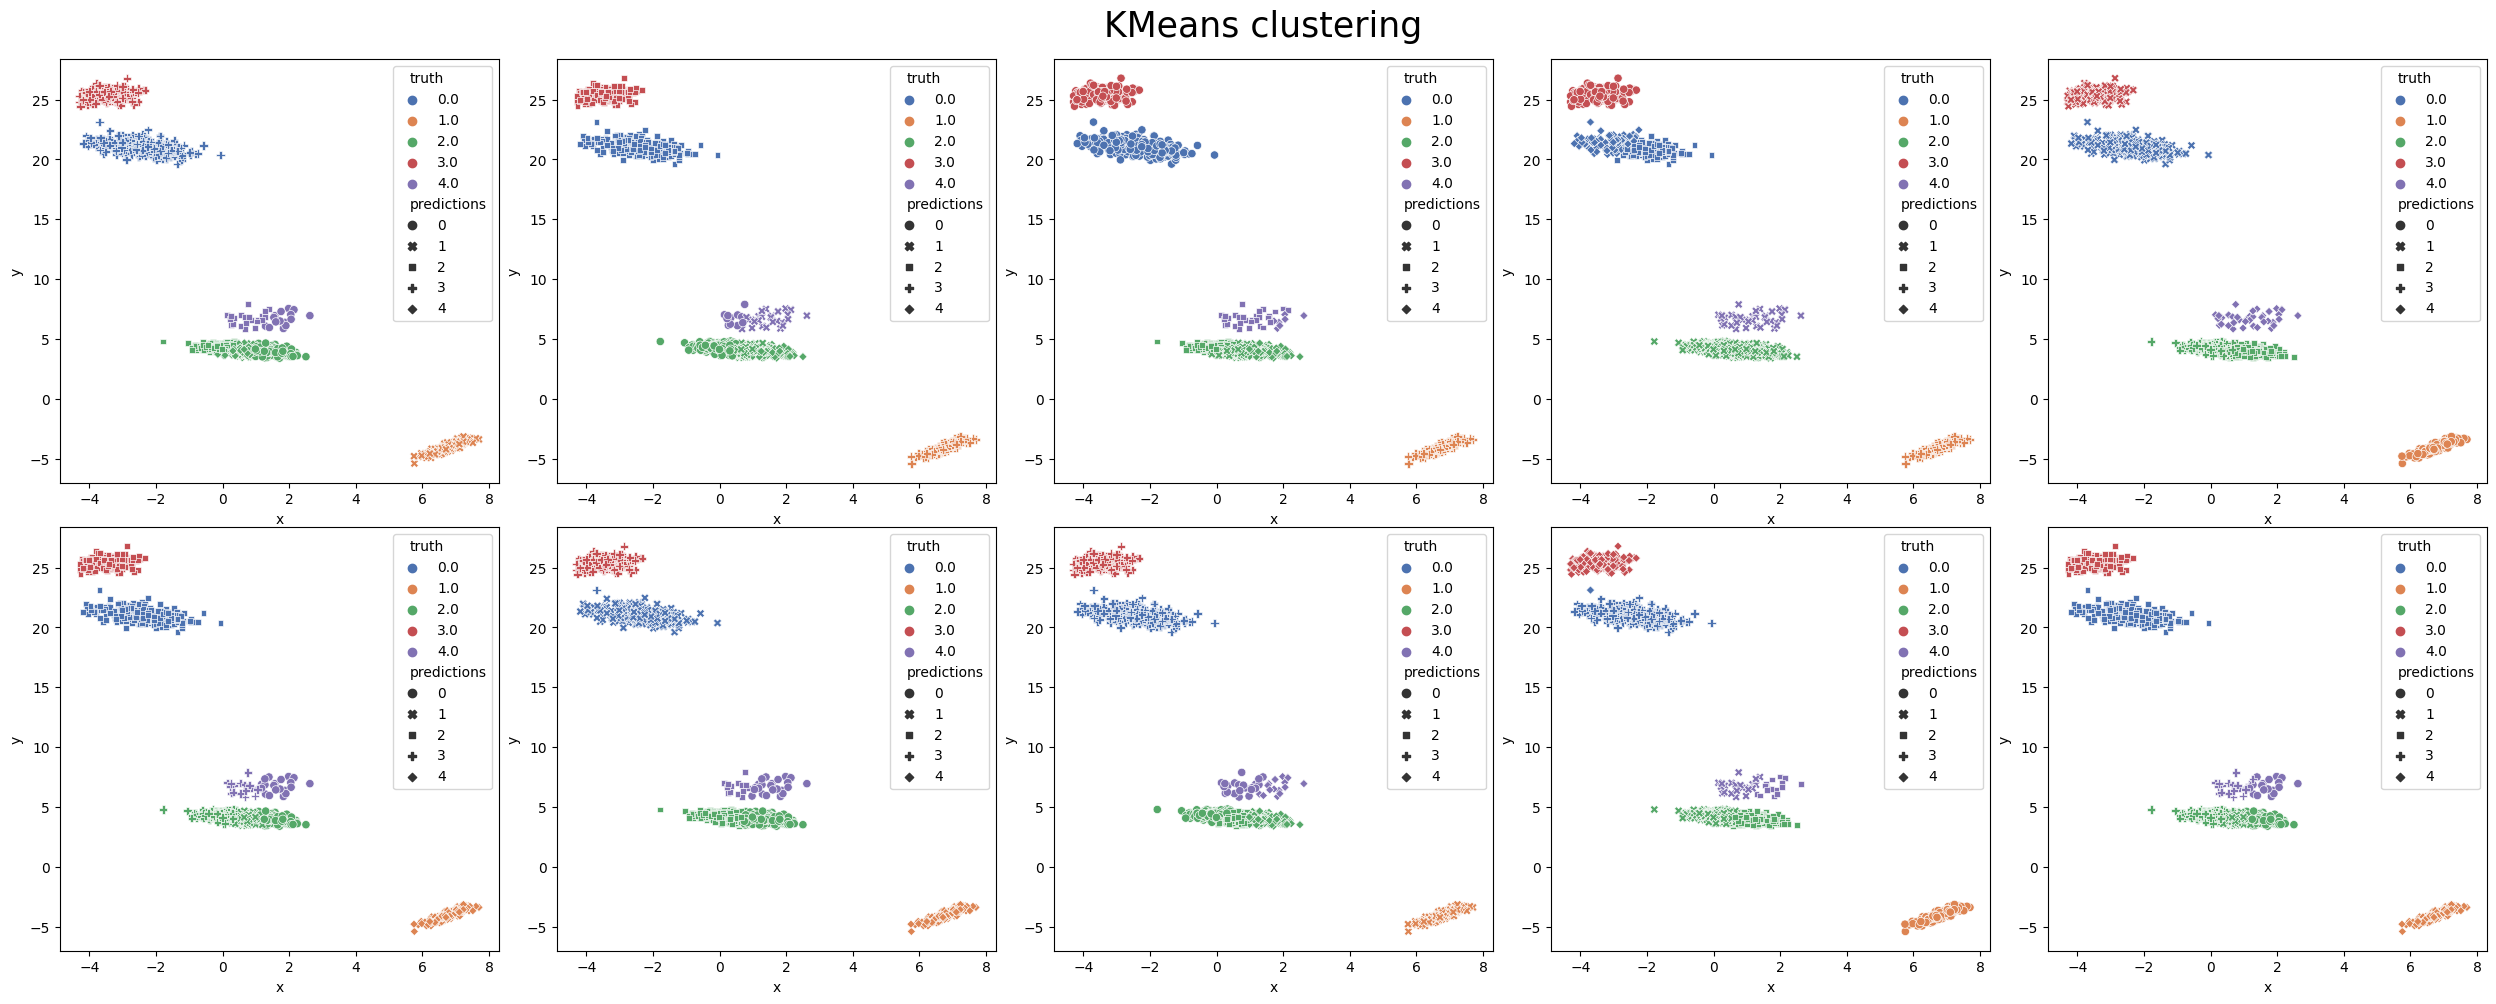

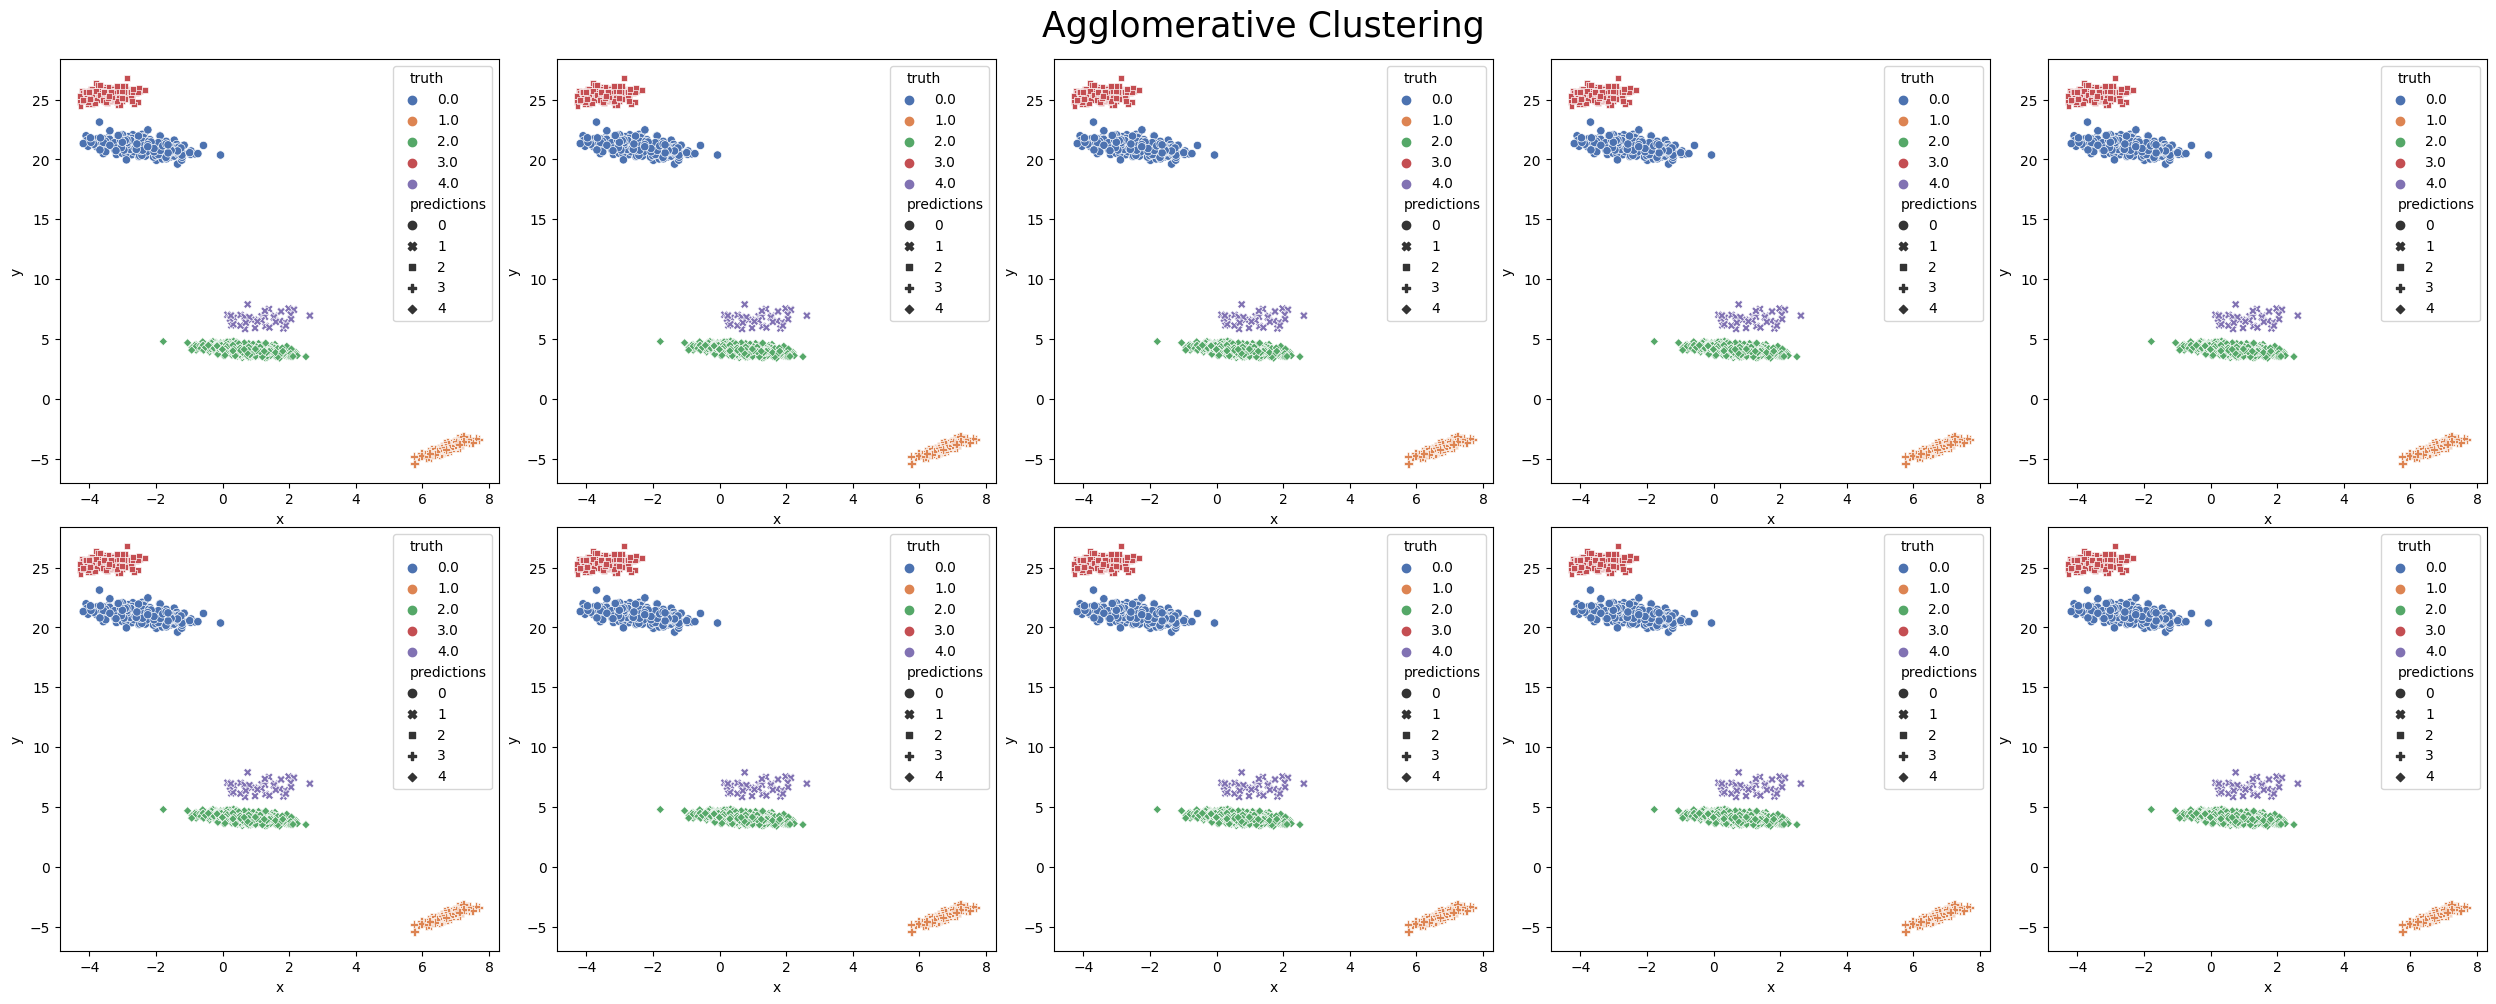

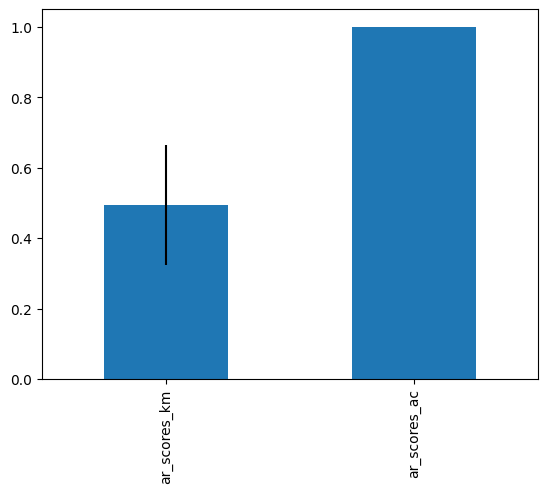

In [7]:
clusters_comp(q11c_data, q11c_labels)

#### Discussion
In this task, Agglomerative Clustering performs excellent with an exact match to the true labels, scoring an ARI of 1. Conversely, KMeans model only scores around an average of 0.55 after 10 runs. The primary reason is the pattern of the data. Firstly, the clusters are clearly apart from each other with no noises around their edge that is also close to another cluster. This allows the Agglomerative Clustering algorithm to correctly connects closer data of the same cluster.

However, the KMeans has difficulties dealing with data of differing density [1]. For this task, the initial centroids are selected randomly, so they will be more likely to fall on a cluster with higher density. The probability of initial centroids to fall on the low density cluster is smaller. Furthermore, the standard deviation of 0.19 shows a large dispersion of the results due to the inconsistency of initial point.

***References:***<br>
[1] Tan, P. et al. (2019). Cluster Analysis: Basic Concepts and Algorithms. Introduction to data mining. NY NY: Pearson, pp. 526–612.

## Q1.2 (5 marks)

### Q1.2a (3 marks)
Discuss **two** methods that can be used to estimate the *true* number of clusters. A discussion of the suitability and potential issues with each method is expected. No marks are given beyond the first two methods.

### Q1.2a Answer

#### Discussion
- Elbow Method:
    * The elbow method is a popular optimal cluster number estimation method that calculates the **Sum of Squared Errors*** (SSE) against number of clusters used by a clustering model [1]. The optimal value is the usually the point where the linear plot changes from steep to flat line. 
- Silhouette Method:
    * The Silhouette method is another visualised optimal cluster number estimation method which is based on Silhouette analysis[2]. The Silhouette analysis scores each sample according to their **distances from labelled cluster and other clusters**. Then, the average score is calculated and the optimal is determined by the cluster number of maximum score. 

The major difference between the elbow method and the Silhouette method is the scoring criteria. In terms of the Elbow method, only intra-cluster euclidean distances is considered for each sample, whereas inter and intra-clusters distances are used for the Silhouette method [3]. Besides, the Silhouette method allows analysis such as density of cluster, fluctuation of individual sample score in each cluster and comparison between clusters. Moreover, the Silhouette method is likely to find a *more optimal cluster number* than the Elbow method. 

However, the Silhouette method should cost more time to be carried out than the Elbow method due to its complexity. The Silhouette Method also requires at least 2 clusters due to the inter-cluster comparison and so the result will be inaccurate if the optimal cluster number is **1**. Therefore, the Elbow method is more suitable to be applied on smaller and more simple data to obtain a faster and accurate result, whereas complex and larger data may require the application of the Silhouette method. 

Apart from that, another problem is that the results of both methods are highly dependant on the prediction made by the model. Since KMeans uses randomness, the scoring differs every run, which could provide a sub-optimal result if the prediction is bad.

**References:**<br>
[1] Kumar, A. (2020). K-means Clustering Elbow Method & SSE Plot - Python. Data Analytics. [online]. Available from: https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/ [Accessed October 20, 2022].<br>
[2] Oldach, M. (2019). 10 Tips for Choosing the Optimal Number of Clusters. Medium. [online]. Available from: https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92 [Accessed October 20, 2022].<br>
[3] Habib, A.B. (2021). Elbow Method vs Silhouette Co-efficient in Determining the Number of Clusters. MLearning.ai. [online]. Available from: https://medium.com/mlearning-ai/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee [Accessed October 20, 2022].


### Q1.2b (2 marks)

Using the `simple.csv` dataset, apply one of the two methods discussed in Q1.2a to estimate the true number of clusters. Was the estimate correct? Discuss your result.

### Q1.2b Answer

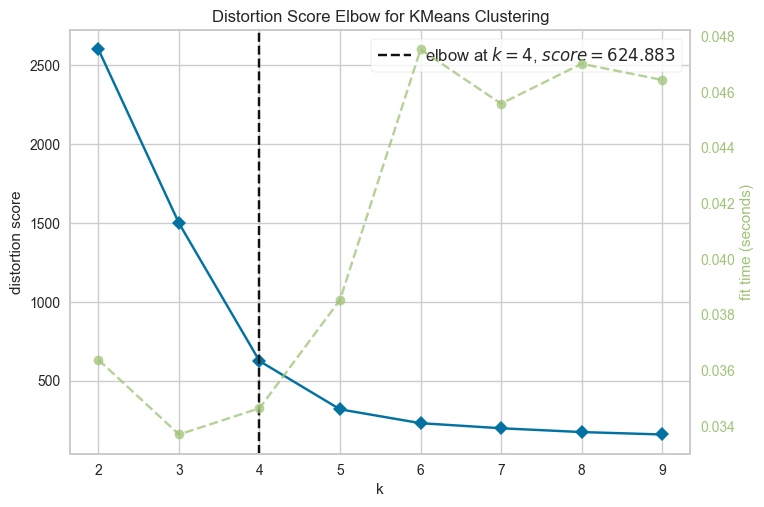

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Visualising the Elbow Method
km = KMeans()
vs = KElbowVisualizer(km, k=(2,10))

vs.fit(simple_data)
vs.show()

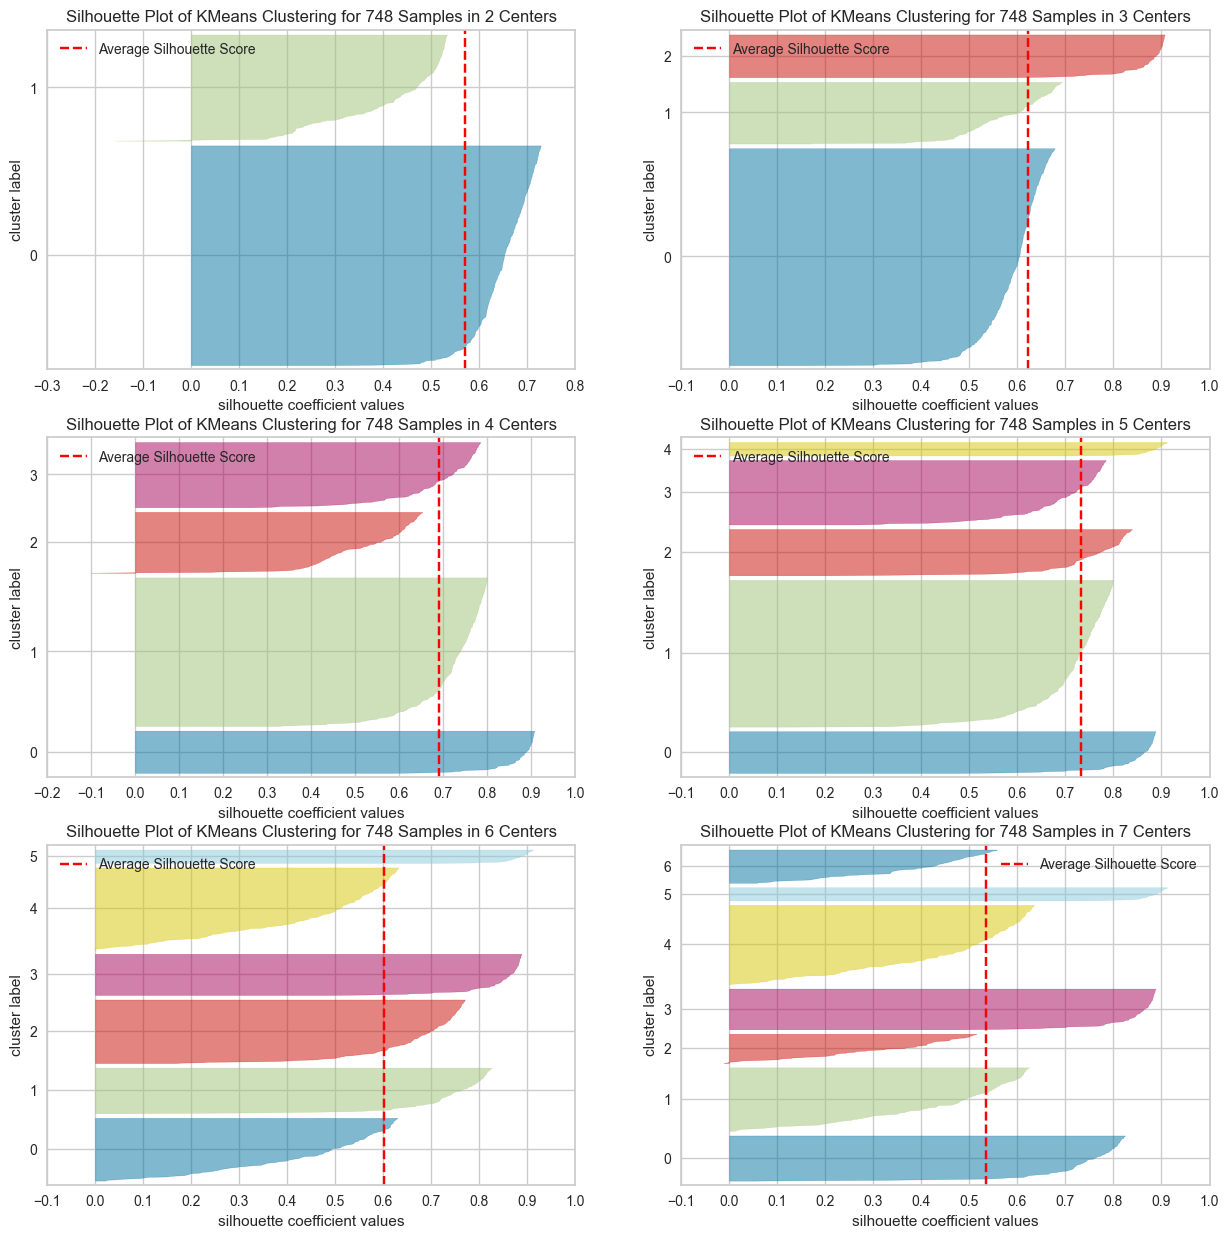

In [9]:
# Visualising the Silhouette Method
fig, axes = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)

    ax = axes[q-1][mod]

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(simple_data) 
    visualizer.finalize()

#### Discussion
The Elbow method estimated the optimal cluster number to be **4**, which is incorrect in this instance. On the other hand, the Silhouette method shows the highest score is achieved at **5** clusters, which is correct. <br>The Elbow method shows less accurate result on data that is less clustered due to its dependant on SSE [1]. A less clustered data could cause the line plotted to be smoother instead of sharp turning point, hence resulting in detection of wrong optimal point. In case of the Silhouette Score, an optimal cluster number is found when most samples in each cluster are far enough from other cluster and close enough to own cluster.

**References:**<br>
[1] Gove, R. (2022). Using the elbow method to determine the optimal number of clusters for k-means clustering. [online]. Available from: https://bl.ocks.org/rpgove/0060ff3b656618e9136b [Accessed October 20, 2022].


## Q1.3 (5 marks)

For this question, we will use the `online_retail_full.csv` dataset, which is a real-world dataset of transactions for an online retail store. Full information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II). Here, we do not have true labels, and need to explore the data instead. This is a common scenario in practice, and will require you explore the data and use clustering (likely requiring multiple iterations and tweaks) to try to find patterns. 

We're going to investigate whether there are groups of customers, how they are similar, and what they may represent. For simplicity, we will start by using KMeans as our model, and we'll remove some of the columns from our input data. Use a range of $K$ values and whichever techniques in Q1.2 are useful to propose interesting $K$ value(s). Comment on the clusters that are produced in terms of the context of the data.

Hints:
* As this dataset has no truth, there is a lot of scope in this question - remember to have some justification for why you have taken the steps you have.
* The quality of your final clusters is not important for marks, as long as you have taken reasonable steps.
* The overall aim is to try to find patterns in the data. KMeans is suggested as a starting point, but it is not always the best algorithm to use as we have seen in previous questions. 
* You can create features from the existing ones. For example, the quantity and price can be multiplied to get a total amount (thus simplifying the data). Other features may require transformation before they can be used.

## Q1.3 Answer

The objective of this task will be clustering the customers based on their frequency of purchasing and amount of spending.

In [10]:
# Load the data (the path may be different for you, adjust if needed)
retail = pd.read_csv("online_retail_full.csv", index_col=False)

The InvoiceDate is transformed into a datetime object.

In [11]:
# Data transformation
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])

Clean the data before it can be used for analysis to prevent errorneous results.

In [12]:
# Data cleaning, check how many data is incomplete in each column
retail.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Description is not useful in this case, wheras Customer ID should be dropped because it is unique and cannot be filled.

In [13]:
retail.dropna(inplace=True)
retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Introduce a **TotalPrice** column (the total spending) by multiplying quantity with price.

In [14]:
retail["TotalPrice"] = retail["Quantity"] * retail["Price"]
retail.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0

Group by customer ID to show each customer's total spending.

In [15]:
df = retail.groupby("Customer ID")["TotalPrice"].sum().reset_index()
df

Customer ID  TotalPrice
0         12346.0      -64.68
1         12347.0     5633.32
2         12348.0     2019.40
3         12349.0     4404.54
4         12350.0      334.40
...           ...         ...
5937      18283.0     2736.65
5938      18284.0      436.68
5939      18285.0      427.00
5940      18286.0     1188.43
5941      18287.0     4177.89

[5942 rows x 2 columns]

Record the frequency of purchase of each customer using **Invoice** count.

In [16]:
cust_freq = retail.groupby("Customer ID")["Invoice"].count().reset_index()
cust_freq

Customer ID  Invoice
0         12346.0       48
1         12347.0      253
2         12348.0       51
3         12349.0      180
4         12350.0       17
...           ...      ...
5937      18283.0      986
5938      18284.0       29
5939      18285.0       12
5940      18286.0       70
5941      18287.0      156

[5942 rows x 2 columns]

Combine with the dataframe consisting TotalPrice column.

In [17]:
df = df.merge(cust_freq, how="left", on="Customer ID")
df

Customer ID  TotalPrice  Invoice
0         12346.0      -64.68       48
1         12347.0     5633.32      253
2         12348.0     2019.40       51
3         12349.0     4404.54      180
4         12350.0      334.40       17
...           ...         ...      ...
5937      18283.0     2736.65      986
5938      18284.0      436.68       29
5939      18285.0      427.00       12
5940      18286.0     1188.43       70
5941      18287.0     4177.89      156

[5942 rows x 3 columns]

Let's visualise what the plotting of the data looks like

In [18]:
def plot_pattern(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(df["TotalPrice"], df["Invoice"], s=5)
    ax2.boxplot(df, labels=df.columns)

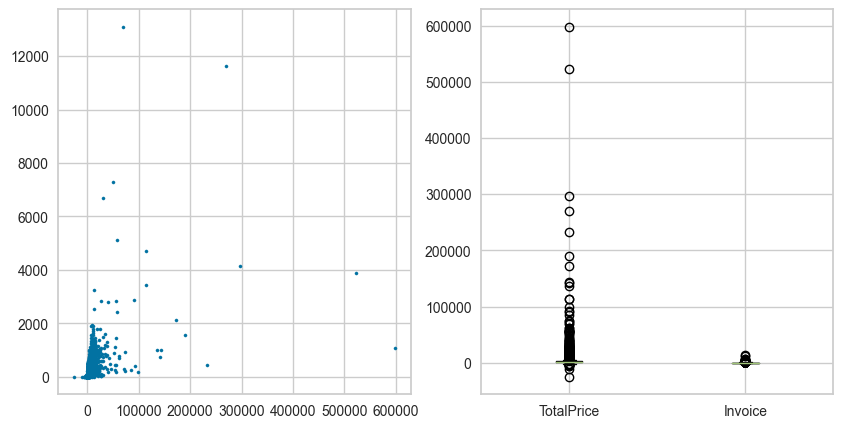

In [19]:
X = df[["TotalPrice", "Invoice"]]
plot_pattern(X)

The scatter plot and boxplot above show that there are a lot of outliers. An simple way to detect and remove the outliers is by using the Interquartile Range multiply by 1.5. Any point falling above at least 1.5 IQR above the thrid quartile or 1.5 IQR below the first quartile can be classified as outlier [1].

**References:**
[1] Han, J. and Kamber, M. (2006). Chapter 2.2: Descriptive Data Summarization. In Data mining: concepts and techniques. The Morgan Kaufmann series in data management systems. Amsterdam ; Boston : San Francisco, CA: Elsevier ; Morgan Kaufmann, pp. 55–56.


In [20]:
def rm_outliers(df, col):
    """
    Remove outliers of a column using Interquartile Range (IQR)
    """
    qt1, qt3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = qt3 - qt1
    return df[(df[col] > qt1 - iqr * 1.5) & (df[col] < qt3 + iqr * 1.5)]

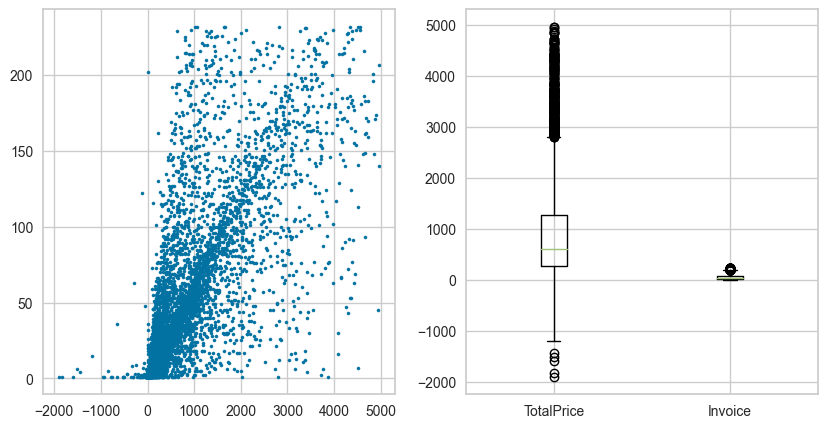

In [21]:
X_1 = rm_outliers(X, "TotalPrice")
X_1 = rm_outliers(X_1, "Invoice")

plot_pattern(X_1)

As shown in the box plot, the magnitude and range of TotalPrice greatly varies with Invoice. Hence, rescaling of the data is required to normalise the range of data, such that they can be on the same scale [1]. By rescaling, the Euclidean Distance calculated will also be more meaningful, otherwise the distance calculated for TotalPrice from the center point will always be bigger than Invoice due to the large numbers. 

**References:**<br>
[1] Uppal, S. (2021). Python | How and where to apply Feature Scaling? GeeksforGeeks. [online]. Available from: https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/ [Accessed October 21, 2022].


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_1 = pd.DataFrame(X_1, columns=["TotalPrice", "Invoice"])
X_1.head()

TotalPrice   Invoice
0   -1.042025 -0.191911
1    1.086269 -0.137107
2    3.522009  2.219460
3   -0.634478 -0.758218
4   -0.668659 -0.685146

Now let's visualise the pattern of the rescaled data.

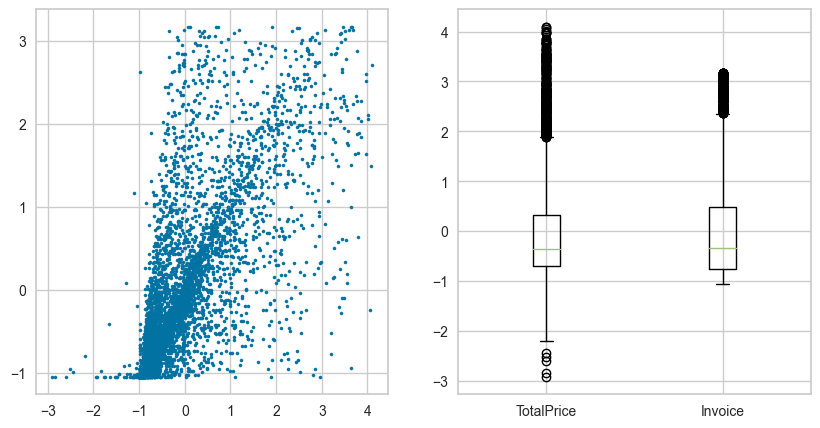

In [23]:
plot_pattern(X_1)

We can see the scaling of both columns are now fairly even, whereas the scatter plot suggests that the data has very uneven distribution. Finally, it reaches the clustering part. Ideally, the clustering should group customers of different behaviours to enable business intelligence such as focusing on frequent buyer and high spender. Conversely, less focus can be given on customers who spend little or visits lesser.

The density of the data also varies across the plot. It is clear that data is extremely noisy and forms a square shape due to the removal of outliers. Hence, if the Hierarchical Method is used, single linkage is the worst option. The complete or average linkage are resistant to noises and favors globular data which is helpful in this regard. All in all, both KMEans and Agglomerative Clustering approaches will be experimented [1].

The first step is to estimate the optimal cluster number using the Elbow method and the Silhouette method.

**References:**<br>
[1] Tan, P. et al. (2019). Cluster Analysis: Basic Concepts and Algorithms. In Introduction to data mining. NY NY: Pearson, pp. 526–612.

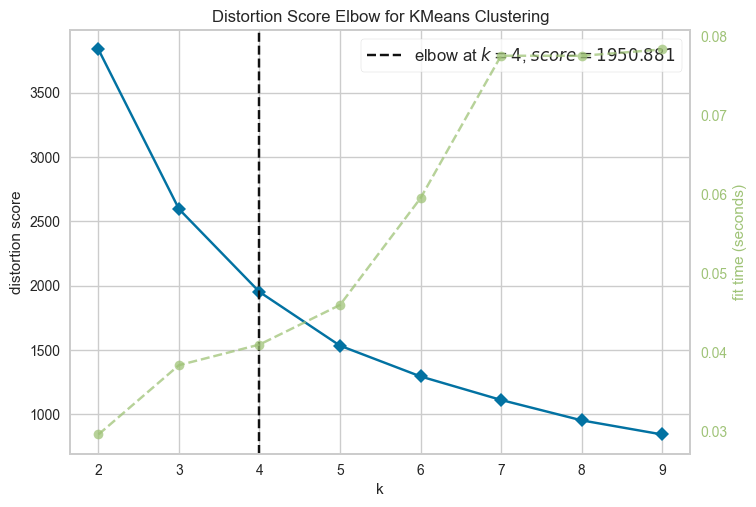

In [24]:
km = KMeans(random_state=42)
kev = KElbowVisualizer(km, k=(2, 10))
kev.fit(X_1)
kev.finalize()

The Elbow method suggests the optimal number of cluster to be **4**, but the smoothness of the plotting with no sharp turning point is not convincing.

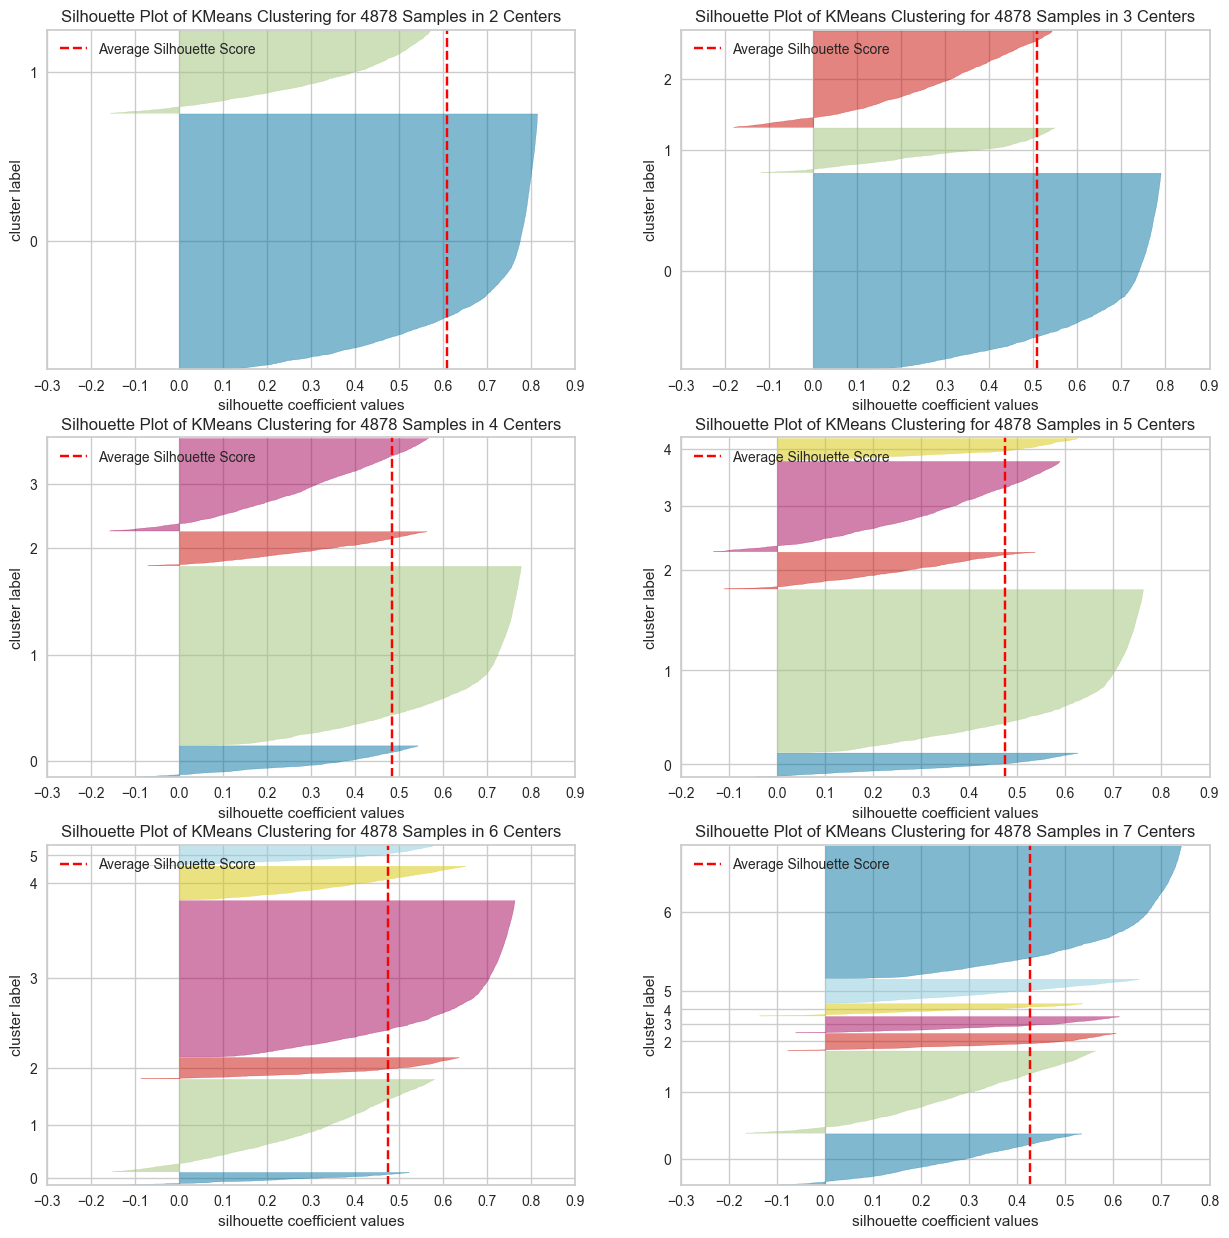

In [25]:
# Visualising the Silhouette Method
fig, axes = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)

    ax = axes[q-1][mod]

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X_1) 
    visualizer.finalize()

The different Silhouette plot suggests that cluster number of 2 has the highest average Silhouette score but the sample numbers between cluster (thickness) is not uniform. Cluster number 3, 4 and 5 are good choices among all due to their heigher score and more uniform thickness than other. To have a better insight, visualisation of data with different number of clusters can be made.

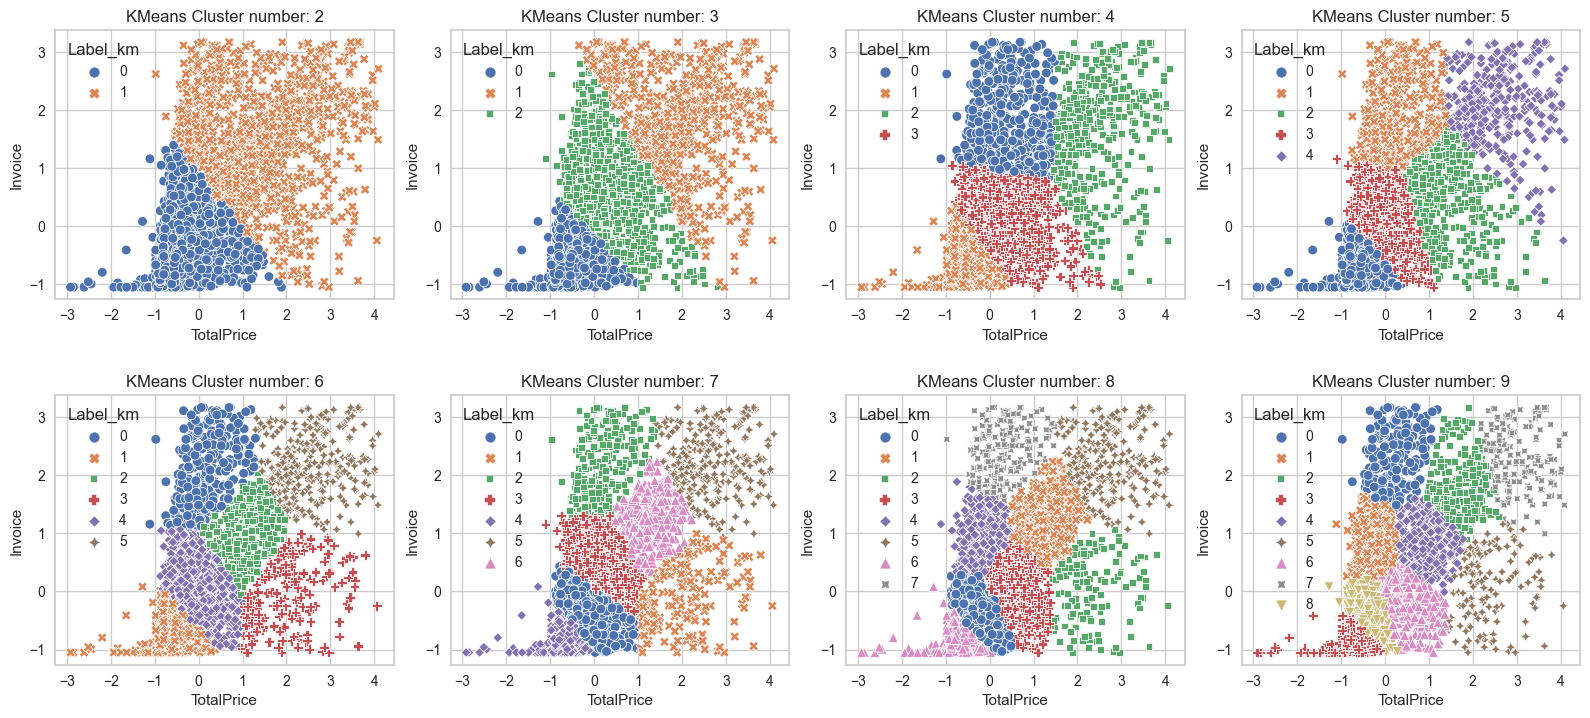

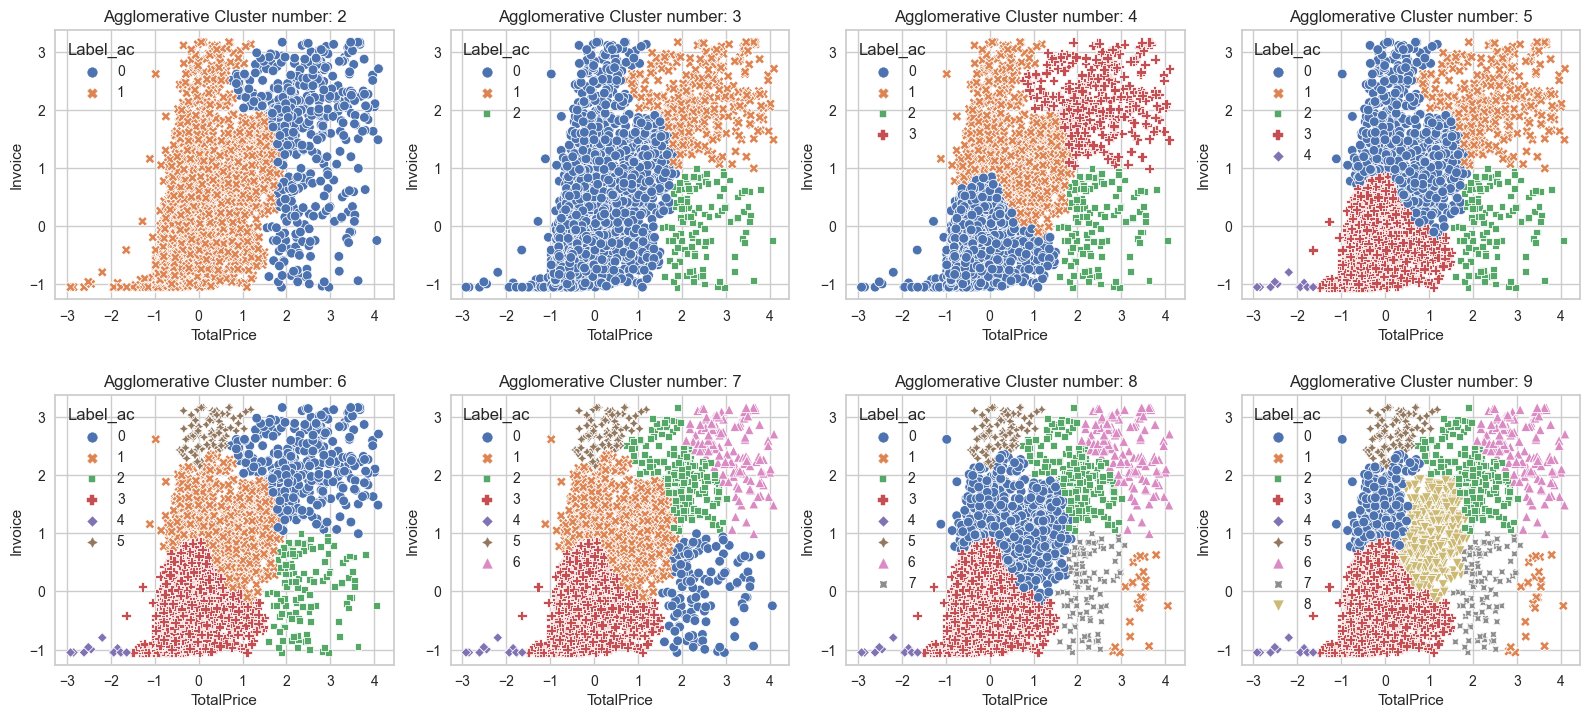

In [26]:
df_res = X_1.copy()
fig1, axs1 = plt.subplots(2, 4, figsize=(16, 7))
fig2, axs2 = plt.subplots(2, 4, figsize=(16, 7))

fig1.tight_layout(h_pad=4)
fig2.tight_layout(h_pad=4)
for i in range(2, 10, 1):
    km = KMeans(n_clusters=i, random_state=1997).fit(X_1)
    ac = AgglomerativeClustering(n_clusters = i, linkage="average").fit(X_1)
    df_res["Label_km"] = km.labels_
    df_res["Label_ac"] = ac.labels_

    sns.scatterplot(
        x="TotalPrice",
        y="Invoice",
        data=df_res,
        hue="Label_km",
        style="Label_km",
        ax=axs1[(i-2)//4, (i-2)%4],
        legend="brief",
        palette="deep",
    ).set(title=f"KMeans Cluster number: {i}")

    sns.scatterplot(
        x="TotalPrice",
        y="Invoice",
        data=df_res,
        hue="Label_ac",
        style="Label_ac",
        ax=axs2[(i-2)//4, (i-2)%4],
        legend="brief",
        palette="deep"
    ).set(title=f"Agglomerative Cluster number: {i}")

In this step, the visualisation of both KMeans and Agglomerative Clustering algorithm is used for 8 different number of clusters (2, 3, 4, ..., 9). The visualisation is important because it shows how are the data are clustered, and what information can be expressed by each cluster.

#### Discussion
- KMeans:
    - $K=3$ -> the data is clustered into 3 sections, where cluster 0 is low in both Invoice and TotalPrice, consists of the low spending customers. Then, cluster 2 is either high in Invoice or high in TotalPrice or average in both which are the medium spenders. Cluster 1 are the customers who has high TotalPrice and more frequent Invoice. 
    - $K=4$ -> the clusters are mostly same as $K=3$, but an additional group of customers with *high Invoice* and *low TotalPrice* is clustered. This indicates the group of customer who visits the store frequently but does not spend much.
    - $K=5$ -> an extra cluster of *low Invoice* and *high TotalPrice* is added but it has some overlapping with clusters of *high Invoice*. Cluster numbers above this is too complex to be meaningful.

- Agglomerative Clustering (`linkage='average'`):
    - $K=3$ -> Unlike KMeans, the data is seperated vertically into two sections. Cluster 0 consist most of the data with *low Invoice* **AND** *low TotalPrice*, whereas cluster 1 and 2 are both of *high TotalPrice*. Cluster 2 has lower invoice than cluster 1. 
    - $K=4$ -> Like KMeans, the clusters are mostly same as $K=3$, but an additional group of customers with *high Invoice* and *low TotalPrice* is clustered. However, the boundary of the new cluster tends to overlap with other clusters.
    - $K=5$ -> Only a small cluster of *low Invoice* and *low TotalPrice* is added which is not very meaningful.

The comparison between these two algorithm shows that KMeans clusters have more decisive boundary than that of the Agglomerative Clustering. This is mainly due to the characteristic of *average linkage* which favours globular pattern [1]. This results in inaccurate clustering because customers with higher spending and purchase frequency are sometimes clustered with customers with lower values in the same attributes. This may cause some customers to be missed out when analysing the product bought by the high spending and high frequency customers. 

On the other hand, the clustering done by KMeans show a good distinction between each cluster, where customers in each cluster has similar properties. It is especially well clustered at $K=3$ and $K=4$, but $K=4$ should be the optimal cluster number due to the extra detail expressed by an additional cluster than $K=3$.

**References:**<br>
[1] Tan, P. et al. (2019). Cluster Analysis: Basic Concepts and Algorithms. In Introduction to data mining. NY NY: Pearson, pp. 526–612.


# Question 2: Itemset Rule Mining (4 marks) 

For this question, we will be using a [real-world dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) which gives the votes of 435 U.S. congressmen on 16 key issues gathered in the mid-1980s, and also includes their party affiliation as a binary attribute. This is a purely nominal dataset with some missing values (corresponding to abstentions). It is normally treated as a classification problem, the task being to predict party affiliation based on voting patterns. However, association-rule mining can also be applied to this data to seek interesting associations.

We will be using [Weka](https://www.cs.waikato.ac.nz/ml/weka/), both for its utility for itemset rule mining, and to use a different approach for exploring data. You should have some experience using Weka from the first (non-assessed) week.

You may need to take screenshots of Weka and include them in your answer below, or copy & paste the relevant rules. Please ensure that your answer and rules are clearly legible.

## Q2.1 (3 marks)

In Weka, run `Apriori` on this dataset using default settings. Comment on any patterns you see in the rules that are generated. Also discuss their support, confidence, and lift, demonstrating that you understand how they are calculated, their role, and how to interpret these values.

## Q2.1 Answer

The *Support* is the ratio of an item set to the entire record count. The *Confidence* is the accuracy of a prediction, which is the ratio of entire rule to its Left Hand Side rule [1]. In terms of lift, it calculates the interest factor which is the rise in likelihood of a prediction to happen [2].

![Result image](apriori_res.png)

Take rule rank 1 for instance, the rule is 
```properties
if adoption-of-the-budget-resolution=y and physician-fee-freeze=n then  Class=democrat
```
The count of LHS rule is *219* with a confidence of **1.0**. This indicates that everytime *adoption-of-the-budget-resolution* is voted *y* and *physician-fee-freeze* is voted *n*, it is 100% voted by the *Democrats*. Then, the *lift* is calculated by the *confidence* divide by *support(Democrat)* which is $267/435$. So the lift in  probability of determining the *Democrat* class is rised by 1.63 with the presence of the attributes `adoption-of-the-budget-resolution=y and physician-fee-freeze=n` [3].

Moreover, we can observe that the *lift* is higher at rule of rank 7:
```properties
el-salvador-aid=n ==> aid-to-nicaraguan-contras=y
```
It is noted that the count of `aid-to-nicaraguan-contras=y` is only **204** whereas `el-salvador-aid=n` is **208**. However, the total count of *aid-to-nicaraguan* is only $242$, with a support of $242/435$. Therefore, the increase in probability (*lift*) is higher than that of rank 1.

All in all, the *Support* can be used to know the frequency of an itemset over the entire transactions, also the *probability*. For *Confidence*, it tells if a rule prediction is accurate and probability it happens in the transaction. Then, the *Lift* is calculated to learn the impact of LHS rule on the probability of predicted result. $>=1$ shows that it has positive impact, $<1$ implies a negative impact.  

**References:**<br>
[1]: Tan, P. et al. (2019). Association Analysis: Basic Concepts and Algorithms. In Introduction to data mining. NY NY: Pearson, pp. 358–361.<br>
[2]: Witten, I.H., Frank, E. and Hall, M.A. (2011). Chapter 5 - Credibility: Evaluating What’s Been Learned. In Data mining: practical machine learning tools and techniques. Morgan Kaufmann series in data management systems. Burlington, MA: Morgan Kaufmann, pp. 168-169.<br>
[3]: Garg, A. (2019). Complete guide to Association Rules (1/2). Medium. [online]. Available from: https://towardsdatascience.com/association-rules-2-aa9a77241654 [Accessed October 21, 2022].


## Q2.2 (1 mark)

It is interesting to see that none of the rules in the default output involve `class = republican`. Why do you think that is?

## Q2.2 Answer

The default output shows the top 10 rules by confidence in descending order. Since no rule involves `class = republican` is shown, their confidence could be lower than the top 10 rules. From this, it illustrates that the *Democrats* tend to have more unanimous vote than the *Republican*.